In [3]:
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
test.shape

(6928123, 5)

In [5]:
best = test[test['type']=='orders']
order_count = {}
for i in best['aid']:
    order_count.setdefault(i,0)
    order_count[i] += 1
    
best = pd.DataFrame.from_dict(order_count, orient = 'index', columns=["count"])
best = best.sort_values('count',ascending=False)
best.head()

,count
986164,74
1460571,70
329725,54
1043508,54
332654,47


In [5]:
test_df = test
test_df["minutes"] = test[["session", "ts"]].groupby("session").diff(-1)*(-1/1000/60)
test_df = test_df.sort_values(['minutes'],ascending=False)
# 머무른 시간

In [44]:
test

,session,aid,ts,type,minutes
0,12899779,59625,1661724000278,clicks,NaN
1,12899780,1142000,1661724000378,clicks,0.966233
2,12899780,582732,1661724058352,clicks,0.847450
3,12899780,973453,1661724109199,clicks,0.461150
4,12899780,736515,1661724136868,clicks,0.306333
...,...,...,...,...,...
6928118,14571577,1141710,1662328774770,clicks,NaN
6928119,14571578,519105,1662328775009,clicks,NaN
6928120,14571579,739876,1662328775605,clicks,NaN
6928121,14571580,202353,1662328781067,clicks,NaN


In [72]:
# click 하고 머무른 시간이 길수록 cart에 담을 가능성이 높지 않을까??

test1 = test_df[(test_df['type']=='clicks')&(test_df['minutes']<10)&(test_df['session']<12900000)]
test1

,session,aid,ts,type,minutes
2712,12899962,659399,1661724728872,clicks,9.746067
1840,12899903,1795456,1661726399051,clicks,9.743633
750,12899846,784175,1661724012926,clicks,9.505717
3023,12899989,1782678,1661725432706,clicks,9.482667
2541,12899949,1036608,1661789855964,clicks,9.437017
...,...,...,...,...,...
2299,12899926,1050985,1661901256062,clicks,0.035117
1209,12899858,131315,1661724447693,clicks,0.033233
1549,12899898,138588,1661724288447,clicks,0.031333
967,12899850,323291,1661882003152,clicks,0.030150


In [69]:
test1 = test_df[(test_df['type']=='clicks')&(test_df['minutes']<4)&(test_df['session']<12900000)]
test1

,session,aid,ts,type,minutes
857,12899850,1079536,1661789731029,clicks,3.994000
2384,12899938,779242,1661724475873,clicks,3.992433
265,12899798,1344706,1661724328775,clicks,3.963400
1049,12899852,948513,1661804625959,clicks,3.962250
822,12899850,880867,1661767713278,clicks,3.957567
...,...,...,...,...,...
2299,12899926,1050985,1661901256062,clicks,0.035117
1209,12899858,131315,1661724447693,clicks,0.033233
1549,12899898,138588,1661724288447,clicks,0.031333
967,12899850,323291,1661882003152,clicks,0.030150


In [73]:
test_df[(test_df['type']=='carts')&(test_df['session']<12900000)]

,session,aid,ts,type,minutes
2019,12899919,1157411,1661767662021,carts,6481.360500
350,12899808,1766994,1661724020028,carts,2053.362567
2243,12899926,570806,1661811247898,carts,1241.293533
541,12899824,736515,1661724232628,carts,729.664750
2017,12899919,712456,1661725344712,carts,704.576567
...,...,...,...,...,...
2665,12899953,1652087,1661724646582,carts,NaN
2686,12899958,1030910,1661724054838,carts,NaN
2802,12899969,1386890,1661941675582,carts,NaN
2871,12899973,1560287,1661724058987,carts,NaN


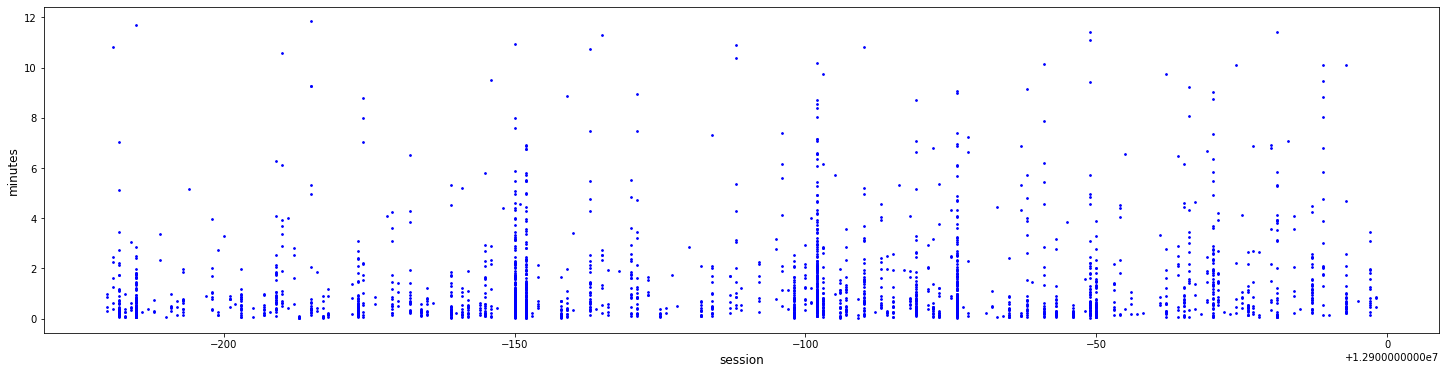

In [71]:
plt.figure(figsize=(25,6))
plt.scatter(test1['session'], test1['minutes'], c = 'blue', s=3)
plt.xlabel('session', size = 12)
plt.ylabel('minutes', size = 12)
plt.show()

In [6]:
a = test_df[(test_df['type']=='clicks')|(test_df['type']=='orders')]
a = a.sort_index()

In [10]:
a["session_aid"] = a["session"].astype('str') + "_" + a["aid"].astype('str')
a = a[a.session_aid.duplicated(keep=False)]

In [46]:
b = a.copy()
b.minutes = b.minutes.round(2)

In [47]:
b.minutes = ' ' + b.minutes.astype('str')
b = b.groupby(['session','type'])['minutes'].sum().reset_index()
c = b[b['type']=='orders']
b = b[b['type']=='clicks']

In [49]:
e = pd.merge(c,b,on='session',how='left')

In [54]:
e.head(30)

,session,type_x,minutes_x,type_y,minutes_y
0,12899782,orders,-0.0 -0.0 -0.0 -0.0,clicks,2.72 0.45 0.21 0.69 0.12 5.11 0.91 1.73 0.19 ...
1,12899793,orders,-0.0 -0.0 1.07,clicks,0.75 0.73 1.84 0.39 804.0 0.38 0.79 14.69 0.6...
2,12899799,orders,-0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 nan,clicks,0.15 0.14 0.27
3,12899803,orders,-0.0 -0.0,clicks,0.99 0.14 0.4 0.52
4,12899813,orders,-0.0 -0.0 -0.0 nan,clicks,0.04 0.04 0.09 0.04 0.04 0.07
5,12899850,orders,-0.0 -0.0 -0.0 nan,clicks,0.7 0.68 1.44 1.99 2.74 0.37 0.45 0.16 0.18 0...
6,12899854,orders,0.46,clicks,0.59 0.69 2.12
7,12899858,orders,-0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0,clicks,0.21 0.05 0.12 0.72 0.12 0.13 0.07 1.66 0.18 ...
8,12899860,orders,449.47,clicks,3.4 215.3 nan
9,12899863,orders,nan,clicks,1.47 23.91 2.14 4.28 1.41 4.76 0.45 1.25 10.7...


In [26]:
test_df[(test_df['session']==13545251)]

,session,aid,ts,type,minutes
2814403,13545251,303865,1661944735923,carts,456.474517
2814408,13545251,1237691,1661973589904,clicks,22.437733
2814406,13545251,274477,1661972842035,clicks,9.999967
2814404,13545251,1237691,1661972124394,clicks,9.640217
2814407,13545251,1843462,1661973442033,clicks,2.464517
2814405,13545251,274477,1661972702807,carts,2.320467
2814402,13545251,303865,1661944728451,clicks,0.124533
2814409,13545251,303865,1661974936168,clicks,NaN
